In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_raw = pd.read_csv("Bangalore_House_Price_data/Bengaluru_House_Data.csv")
data_raw.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data_raw.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [4]:
data = data_raw.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
def value_count(a):
    for i in a:
        print(a[i].value_counts())
        print("_______________________")
value_count(data)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
_______________________
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
_______________________
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
_______________________
size


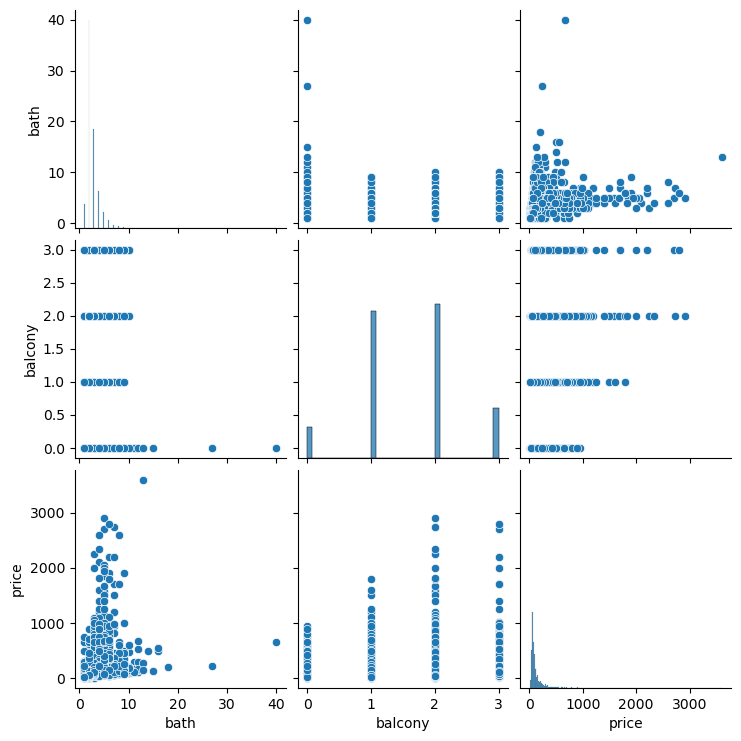

In [7]:
sns.pairplot(data)

<Axes: >

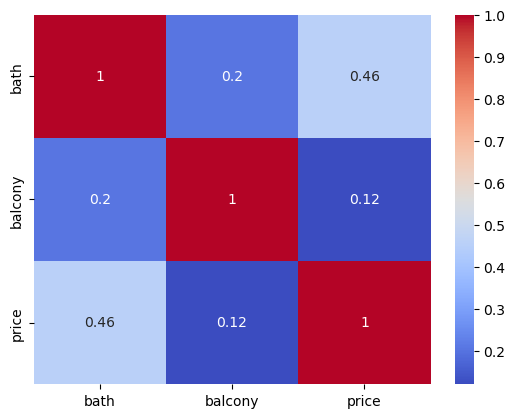

In [8]:
var = ["bath", "balcony", "price"]
sns.heatmap(data[var].corr(), cmap = "coolwarm", annot = True)

In [9]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [10]:
data.isnull().mean() * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [11]:
data2 = data.drop('society', axis = 1)
data2['balcony'] = data2['balcony'].fillna(data2['balcony'].mean())
data2.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64

In [12]:
data2.shape

(13320, 8)

In [13]:
data3 = data2.dropna()
data3.shape

(13246, 8)

In [14]:
data3.isnull().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [15]:
#pd.set_option("display.max_columns", None)
#pd.set_option("display.max_rows", None)
#data3['total_sqft'].value_counts()

In [31]:
total_sqft_float = []
for i in data3['total_sqft']:
    try:
        total_sqft_float.append(float(i))
    except:
        try:
            tmp = []
            tmp = i.split('-')
            total_sqft_float.append((float(tmp[0]) + float(tmp[-1])) / 2)
        except:
            total_sqft_float.append(np.nan)
data4 = data3.reset_index(drop = True)
data5 = data4.join(pd.DataFrame({'total_sqft_float': total_sqft_float}))
data5[99:130]

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float
99,Built-up Area,Ready To Move,Chandapura,2 BHK,650,1.0,1.0,17.00,650.0
100,Plot Area,Ready To Move,Kothanur,3 Bedroom,2400,2.0,1.0,150.00,2400.0
101,Super built-up Area,Ready To Move,Green View Layout,2 BHK,1007,2.0,2.0,43.00,1007.0
102,Super built-up Area,Ready To Move,Shantiniketan Layout,2 BHK,1200,2.0,2.0,50.00,1200.0
103,Super built-up Area,Ready To Move,Peenya,2 BHK,966,2.0,2.0,49.90,966.0
104,Built-up Area,Ready To Move,Nagarbhavi,3 BHK,1630,2.0,1.0,98.00,1630.0
105,Built-up Area,Ready To Move,Rajaji Nagar,3 BHK,1640,3.0,2.0,229.00,1640.0
106,Built-up Area,Ready To Move,Jalahalli West,2 BHK,782,2.0,2.0,55.68,782.0
107,Super built-up Area,19-Apr,Devanahalli,2 BHK,1260,2.0,2.0,66.78,1260.0
108,Super built-up Area,Ready To Move,Lakshmiamma Garden,3 BHK,1800,3.0,3.0,120.00,1800.0


In [32]:
data5.isnull().sum()
data6 = data5.dropna()
data6.shape

(13200, 9)

In [33]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13200 entries, 0 to 13245
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_type         13200 non-null  object 
 1   availability      13200 non-null  object 
 2   location          13200 non-null  object 
 3   size              13200 non-null  object 
 4   total_sqft        13200 non-null  object 
 5   bath              13200 non-null  float64
 6   balcony           13200 non-null  float64
 7   price             13200 non-null  float64
 8   total_sqft_float  13200 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


In [34]:
data6['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13241    5 Bedroom
13242        4 BHK
13243        2 BHK
13244        4 BHK
13245        1 BHK
Name: size, Length: 13200, dtype: object

In [39]:
sz = []
for i in data6['size']:
    tmp = []
    tmp = i.split(" ")
    try:
        sz.append(int(tmp[0]))
    except:
        sz.append(np.nan)
        print("err,", i)
data6 = data6.reset_index(drop = True)
data7 = data6.join(pd.DataFrame({'bhk' : sz}))
data7.shape

(13200, 10)

In [40]:
data7.tail()

,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk
13195,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.000000,231.0,3453.0,5
13196,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,1.584376,400.0,3600.0,4
13197,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.000000,60.0,1141.0,2
13198,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.000000,488.0,4689.0,4
13199,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,550,1.0,1.000000,17.0,550.0,1


<Axes: xlabel='total_sqft_float'>

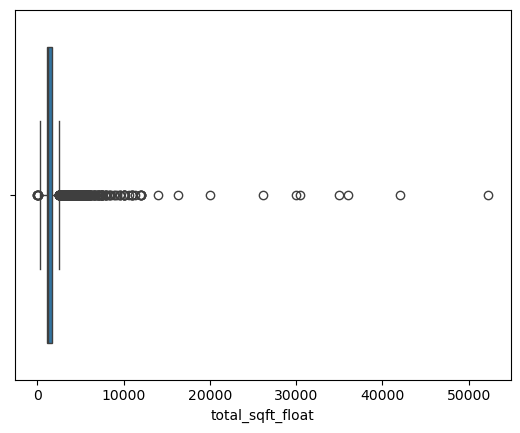

In [41]:
sns.boxplot(x = data7['total_sqft_float'])

In [43]:
data8 = data7[~(data7['total_sqft_float'] / data7['bhk'] < 350)]

In [47]:
data8 = data7[~(data7['total_sqft_float'] / data7['bhk'] < 350)]
data8.shape

(12106, 10)

In [106]:
data8['price_per_sqft'] = data8['price'] * 100000 / data8['total_sqft_float']
data8.head()

C:\Users\lequa\AppData\Local\Temp\ipykernel_21972\1274489382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data8['price_per_sqft'] = data8['price'] * 100000 / data8['total_sqft_float']


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_float,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2,4250.000000


In [107]:
data8.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [110]:
vars = ['price', 'total_sqft_float', 'price_per_sqft', 'balcony', 'bath', 'bhk']
plt.figure(figsize=(16,12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

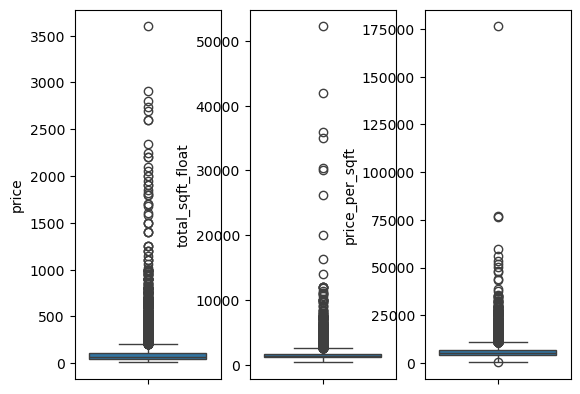

In [109]:
for i in range(1, 4):
    plt.subplot(1, 3, i)
    sns.boxplot(data8[vars[i - 1]])

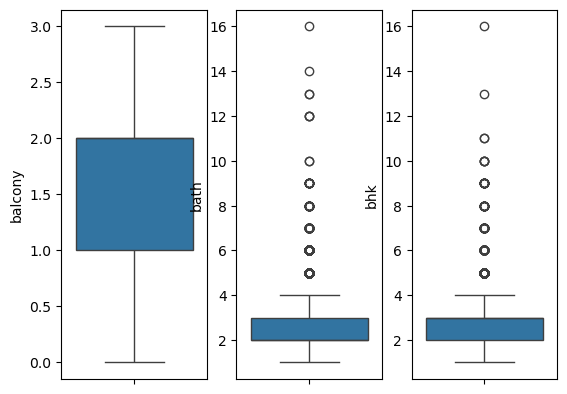

In [101]:
sns.boxplot(data8['price'])

In [140]:
def remove_pps_outliers(data):
    df = data.copy()
    df['mean'] = df.groupby('location')['price_per_sqft'].transform('mean')
    df['std'] = df.groupby('location')['price_per_sqft'].transform('std')
    df = df[(df['price_per_sqft'] >= df['mean'] - df['std']) & (df['price_per_sqft'] <= df['mean'] + df['std'])]
    return df.drop(['mean', 'std'], axis = 1)
data9 = remove_pps_outliers(data8)
data9.shape

(9236, 11)

In [151]:
def remove_bhk_outliers(data):
    df = data.copy()
    for i, j in data.groupby('location'):
        for k, l in j.groupby('bhk'):
            df['mean'] = j['price_per_sqft'].transform('mean')
data10 = remove_bhk_outliers(data9)
data10

ValueError: Function did not transform